# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jonyamaoka/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
news_api_key = os.getenv('news_api_key')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news=newsapi.get_everything(q='bitcoin', language='en')

In [5]:
# Fetch the Ethereum news articles
eth_news=newsapi.get_everything(q='ethereum', language='en')

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass


In [7]:
btc_df = pd.DataFrame(btc_sentiments)
btc_df

,text,date,compound,positive,negative,neutral
0,A similar hoax earlier this year tied Walmart ...,2021-11-05,-0.2732,0.000,0.063,0.937
1,Theres a big new presence slurping up power fr...,2021-10-28,0.3612,0.096,0.000,0.904
2,"For all the talk of democratizing finance, the...",2021-10-26,0.0000,0.000,0.000,1.000
3,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.000,0.847
4,Representation of cryptocurrency Bitcoin is pl...,2021-10-21,0.0000,0.000,0.000,1.000
5,A representation of the virtual cryptocurrency...,2021-10-20,0.0000,0.000,0.000,1.000
6,A representation of the virtual cryptocurrency...,2021-10-20,0.0000,0.000,0.000,1.000
7,Posted \r\nBitcoin climbed to a record high on...,2021-10-20,0.4588,0.103,0.000,0.897
8,A representation of the virtual cryptocurrency...,2021-10-19,0.0000,0.000,0.000,1.000
9,By Reuters Staff\r\nSINGAPORE (Reuters) - Bitc...,2021-10-19,0.0000,0.000,0.000,1.000


In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [9]:
eth_df = pd.DataFrame(eth_sentiments)
eth_df

,text,date,compound,positive,negative,neutral
0,A new cross-chain bridge is currently connecte...,2021-10-16,0.0000,0.000,0.0,1.000
1,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.0,0.847
2,Ethereum and bitcoin are the two biggest crypt...,2021-11-05,0.4588,0.094,0.0,0.906
3,Elon Musk\r\npicture alliance / Getty Images\r...,2021-11-01,0.5267,0.093,0.0,0.907
4,Cryptocurrency and business continuity line im...,2021-11-01,0.4588,0.097,0.0,0.903
5,Apple CEO Tim Cook said he owns cryptocurrency...,2021-11-09,0.4019,0.076,0.0,0.924
6,"With crypto rewards cards, a small percentage ...",2021-11-10,0.8176,0.221,0.0,0.779
7,Bitcoin and Ethereum.\r\nNurPhoto / Getty Imag...,2021-10-22,0.8225,0.208,0.0,0.792
8,"Representations of cryptocurrencies Bitcoin, E...",2021-11-01,0.0000,0.000,0.0,1.000
9,Grill burger chain Burger King announced a par...,2021-11-01,0.5423,0.099,0.0,0.901


In [10]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.195520,0.050250,0.003150,0.946600
std,0.289429,0.067138,0.014087,0.066127
min,-0.273200,0.000000,0.000000,0.801000
25%,0.000000,0.000000,0.000000,0.896500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.476700,0.103500,0.000000,1.000000
max,0.755800,0.199000,0.063000,1.000000


In [11]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.0,20.000000
mean,0.280475,0.063150,0.0,0.936850
std,0.308037,0.074661,0.0,0.074661
min,0.000000,0.000000,0.0,0.779000
25%,0.000000,0.000000,0.0,0.902500
50%,0.180600,0.036000,0.0,0.964000
75%,0.530600,0.097500,0.0,1.000000
max,0.822500,0.221000,0.0,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH had the highest mean positive score

Q: Which coin had the highest compound score?

A: Both coins had a compound score of 20

Q. Which coin had the highest positive score?

A: ETH had the highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [44]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import string
nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jonyamaoka/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /Users/jonyamaoka/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jonyamaoka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jonyamaoka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')


In [61]:
#Pull eth articles into a list
import itertools
eth_articles = []
for i in eth_df['text']:
    eth_articles.append(i)



In [83]:
# Pull btc articles into a list
btc_articles = []
for i in btc_df['text']:
    btc_articles.append(i)

In [84]:
# Create a string from the list for bitcoin and eth
eth_str = ' '.join(map(str, eth_articles)) 
btc_str = ' '.join(map(str,btc_articles))


In [76]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [90]:
# Create a new tokens column for Bitcoin
btc_processed = tokenizer(btc_str)
btc_processed

['similar',
 'hoax',
 'earlier',
 'year',
 'tied',
 'walmart',
 'litecoinif',
 'buy',
 'something',
 'verge',
 'link',
 'vox',
 'media',
 'may',
 'earn',
 'commission',
 'see',
 'ethic',
 'statementphoto',
 'illustration',
 'thiago',
 'prudencios',
 'char',
 'theres',
 'big',
 'new',
 'presence',
 'slurping',
 'power',
 'us',
 'grid',
 'growing',
 'bitcoin',
 'miner',
 'new',
 'research',
 'show',
 'us',
 'ha',
 'overtaken',
 'china',
 'top',
 'global',
 'destination',
 'bitcoin',
 'mining',
 'char',
 'talk',
 'democratizing',
 'finance',
 'vast',
 'majority',
 'bitcoin',
 'continues',
 'owned',
 'relative',
 'handful',
 'investorsas',
 'flagged',
 'bloomberg',
 'newly',
 'released',
 'data',
 'national',
 'bureau',
 'char',
 'keeping',
 'previous',
 'announcement',
 'amc',
 'theater',
 'accept',
 'cryptocurrencies',
 'payment',
 'online',
 'purchasesbitcoin',
 'ethereum',
 'bitcoin',
 'cash',
 'litecoin',
 'acceptedpreviously',
 'compa',
 'char',
 'representation',
 'cryptocurrency',


In [91]:
# Create a new tokens column for Ethereum
eth_processed = tokenizer(eth_str)
eth_processed

['new',
 'crosschain',
 'bridge',
 'currently',
 'connected',
 'ethereum',
 'crosschain',
 'bridge',
 'cardano',
 'public',
 'chain',
 'come',
 'futurenervostoday',
 'announced',
 'force',
 'bridge',
 'char',
 'keeping',
 'previous',
 'announcement',
 'amc',
 'theater',
 'accept',
 'cryptocurrencies',
 'payment',
 'online',
 'purchasesbitcoin',
 'ethereum',
 'bitcoin',
 'cash',
 'litecoin',
 'acceptedpreviously',
 'compa',
 'char',
 'ethereum',
 'bitcoin',
 'two',
 'biggest',
 'cryptocurrenciesjordan',
 'mansfield',
 'getty',
 'imagescrypto',
 'investor',
 'holding',
 'ethereum',
 'rather',
 'bitcoin',
 'interest',
 'rate',
 'rise',
 'jpmorgan',
 'said',
 'beca',
 'char',
 'elon',
 'muskpicture',
 'alliance',
 'getty',
 'imagesa',
 'cryptocurrency',
 'named',
 'elon',
 'musk',
 'ha',
 'shot',
 'moon',
 'gain',
 'october',
 'dogelon',
 'mars',
 'traded',
 'november',
 'char',
 'cryptocurrency',
 'business',
 'continuity',
 'line',
 'image',
 'business',
 'conceptgetty',
 'imageslittlekn

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [87]:
from collections import Counter
from nltk import ngrams

In [92]:
# Generate the Bitcoin N-grams where N=2
btc_counts = Counter(ngrams(btc_processed, n=2))
print(dict(btc_counts))

{('similar', 'hoax'): 1, ('hoax', 'earlier'): 1, ('earlier', 'year'): 1, ('year', 'tied'): 1, ('tied', 'walmart'): 1, ('walmart', 'litecoinif'): 1, ('litecoinif', 'buy'): 1, ('buy', 'something'): 1, ('something', 'verge'): 1, ('verge', 'link'): 1, ('link', 'vox'): 1, ('vox', 'media'): 1, ('media', 'may'): 1, ('may', 'earn'): 1, ('earn', 'commission'): 1, ('commission', 'see'): 1, ('see', 'ethic'): 1, ('ethic', 'statementphoto'): 1, ('statementphoto', 'illustration'): 1, ('illustration', 'thiago'): 1, ('thiago', 'prudencios'): 1, ('prudencios', 'char'): 1, ('char', 'theres'): 1, ('theres', 'big'): 1, ('big', 'new'): 1, ('new', 'presence'): 1, ('presence', 'slurping'): 1, ('slurping', 'power'): 1, ('power', 'us'): 1, ('us', 'grid'): 1, ('grid', 'growing'): 1, ('growing', 'bitcoin'): 1, ('bitcoin', 'miner'): 1, ('miner', 'new'): 1, ('new', 'research'): 1, ('research', 'show'): 1, ('show', 'us'): 1, ('us', 'ha'): 1, ('ha', 'overtaken'): 1, ('overtaken', 'china'): 1, ('china', 'top'): 1, ('

In [93]:
# Generate the Ethereum N-grams where N=2
eth_counts = Counter(ngrams(eth_processed, n=2))
print(dict(eth_counts))

{('new', 'crosschain'): 1, ('crosschain', 'bridge'): 2, ('bridge', 'currently'): 1, ('currently', 'connected'): 1, ('connected', 'ethereum'): 1, ('ethereum', 'crosschain'): 1, ('bridge', 'cardano'): 1, ('cardano', 'public'): 1, ('public', 'chain'): 1, ('chain', 'come'): 1, ('come', 'futurenervostoday'): 1, ('futurenervostoday', 'announced'): 1, ('announced', 'force'): 1, ('force', 'bridge'): 1, ('bridge', 'char'): 1, ('char', 'keeping'): 1, ('keeping', 'previous'): 1, ('previous', 'announcement'): 1, ('announcement', 'amc'): 1, ('amc', 'theater'): 1, ('theater', 'accept'): 1, ('accept', 'cryptocurrencies'): 1, ('cryptocurrencies', 'payment'): 1, ('payment', 'online'): 1, ('online', 'purchasesbitcoin'): 1, ('purchasesbitcoin', 'ethereum'): 1, ('ethereum', 'bitcoin'): 2, ('bitcoin', 'cash'): 1, ('cash', 'litecoin'): 1, ('litecoin', 'acceptedpreviously'): 1, ('acceptedpreviously', 'compa'): 1, ('compa', 'char'): 1, ('char', 'ethereum'): 1, ('bitcoin', 'two'): 1, ('two', 'biggest'): 1, ('b

In [96]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [97]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_processed)

[('bitcoin', 25),
 ('char', 19),
 ('reuters', 7),
 ('illustration', 6),
 ('taken', 6),
 ('new', 5),
 ('us', 5),
 ('cryptocurrency', 5),
 ('picture', 5),
 ('wa', 5)]

In [98]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_processed)

[('char', 20),
 ('ethereum', 12),
 ('bitcoin', 9),
 ('cryptocurrency', 8),
 ('cryptocurrencies', 5),
 ('new', 4),
 ('york', 4),
 ('illustration', 4),
 ('taken', 4),
 ('june', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [100]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

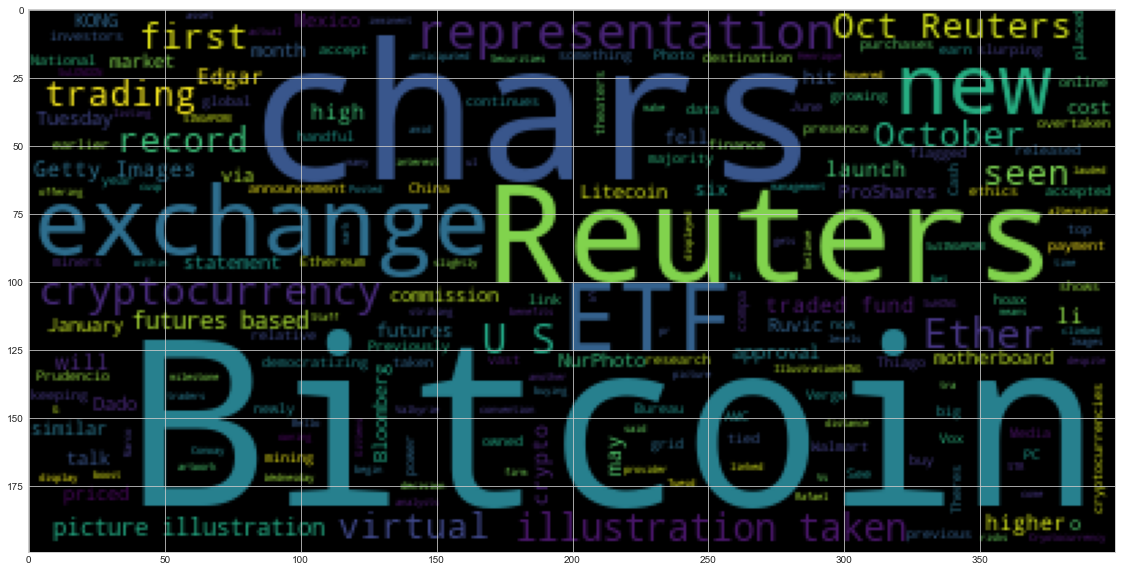

In [104]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_str)
plt.imshow(btc_wc)

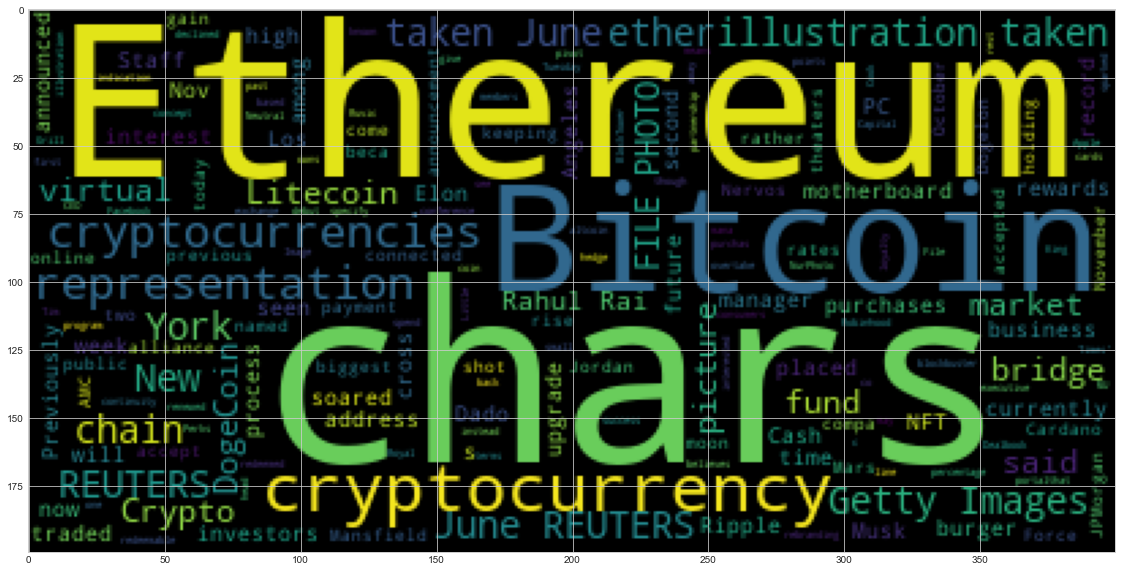

In [105]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_str)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [106]:
import spacy
from spacy import displacy

In [107]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 7.1 MB/s eta 0:00:01
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [108]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
# done above

In [115]:
# Run the NER processor on all of the text
doc = nlp(btc_str)


In [116]:
# Render the visualization
displacy.render(doc, style='ent')

In [119]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_])

['earlier this year', 'Verge', 'Vox Media', 'Photo Illustration', 'Thiago Prudencio/S', 'U.S.', 'U.S.', 'China', 'Bloomberg', 'the National Bureau', 'AMC', 'Bitcoin', 'June 29, 2021', 'REUTERS', 'Dado Ruvic/', 'IllustrationHONG KONG', 'Oct 21', 'Reuters', 'Bitcoin', 'October 19, 2021', 'REUTERS', 'Reuters', 'Bitcoin', 'October 19, 2021', 'REUTERS', 'Edgar SuHONG KONG', 'Reuters', 'Wednesday', 'first', 'U.S.', 'Conway G. Gittens', 'Bitcoin', 'October 18, 2021', 'REUTERS', 'Oct 19', 'Reuters', 'six-month', '+2332', 'Reuters', 'SINGAPORE', 'Reuters', 'six-month', 'Tuesday', 'U.S.', 'STR', 'NurPhoto', 'Getty Images', 'first', 'Tuesday', 'ProShares', 'Bitcoin 2021', 'Marco Bello/', 'The Securities and Exchange Commission', 'Valkyrie', 'ETF', 'ETF', 'NurPhoto', 'ETF', 'first', 'ETF', 'Rafael Henrique/SOPA Images/LightRocket', 'Getty Images', '7%', 'Monday', 'morning', 'around $66,105', '3%', '4,722', 'over 9%', 'Mexican', 'Volaris', 'Benito Juarez International Airport', 'Mexico City', 'Mexi

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_])

---